In [2]:
import warnings
warnings.filterwarnings('ignore')
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Dropout, Flatten
from keras.optimizers import Adam

path='character'
images=[]
classNo=[]
testRatio=0.2
valRatio=0.2
imgDimension=(32,32,3)

In [3]:
myList=os.listdir(path)

numOfClasses=len(myList)

print("Importing Classes..........")
for x in range(0, numOfClasses):
	myPicList=os.listdir(path+"/"+str(x))
	for y in myPicList:
		curImg=cv2.imread(path+"/"+str(x)+"/"+y)
		curImg=cv2.resize(curImg,(imgDimension[0],imgDimension[1]))
		images.append(curImg)
		classNo.append(x)
	print(x)

images=np.array(images)
classNo=np.array(classNo)

Importing Classes..........
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70


In [4]:
x_train, x_test, y_train, y_test=train_test_split(images, classNo, test_size=testRatio)
x_train, x_validation, y_train, y_validation=train_test_split(x_train, y_train, test_size=valRatio)

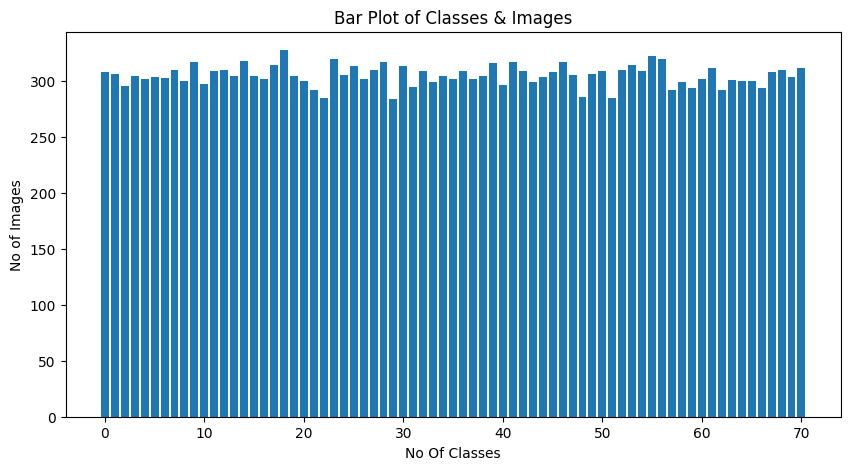

In [5]:
numOfSample=[]

for x in range(0,numOfClasses):
	numOfSample.append(len(np.where(y_train==x)[0]))
	
plt.figure(figsize=(10,5))
plt.bar(range(0, numOfClasses),numOfSample)
plt.title("Bar Plot of Classes & Images")
plt.xlabel("No Of Classes")
plt.ylabel("No of Images")
plt.show()

In [6]:
def preprocessing(img):
	# img=np.astype("uint8")
	img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
	_, img = cv2.threshold(img, 170, 255, cv2.THRESH_BINARY)
	img=cv2.equalizeHist(img)
	img=img/255
	return img


x_train=np.array(list(map(preprocessing, x_train)))
x_test=np.array(list(map(preprocessing, x_test)))
x_validation=np.array(list(map(preprocessing, x_validation)))

In [7]:
x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2],1)
x_test=x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)
x_validation=x_validation.reshape(x_validation.shape[0], x_validation.shape[1], x_validation.shape[2],1)


dataGen=ImageDataGenerator(
	width_shift_range=0.1,
	height_shift_range=0.1,
	zoom_range=0.2,
	shear_range=0.1,
	rotation_range=10)

dataGen.fit(x_train)

y_train=to_categorical(y_train, numOfClasses)
y_test=to_categorical(y_test, numOfClasses)
y_validation=to_categorical(y_validation, numOfClasses)

In [15]:
def myModel():
	noOfFilters=60
	sizeOfFilter1=(5,5)
	sizeOfFilter2=(3,3)
	sizeOfPool=(2,2)
	noOfNode=50

	model=Sequential()
	model.add((Conv2D(noOfFilters, sizeOfFilter1, input_shape=(imgDimension[0],imgDimension[1],1),activation='relu')))
	model.add((Conv2D(noOfFilters, sizeOfFilter1,activation='relu')))
	model.add(MaxPooling2D(pool_size=sizeOfPool))

	model.add((Conv2D(noOfFilters//2, sizeOfFilter2,activation='relu')))
	model.add((Conv2D(noOfFilters//2, sizeOfFilter2,activation='relu')))
	model.add(MaxPooling2D(pool_size=sizeOfPool))
	model.add(Dropout(0.5))


	model.add(Flatten())
	model.add(Dense(noOfNode, activation='relu'))
	model.add(Dropout(0.5))
	model.add(Dense(numOfClasses, activation='softmax'))
	model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
	return model

model=myModel()
print(model.summary())

history=model.fit_generator(dataGen.flow(x_train, y_train,batch_size=50),
	steps_per_epoch=100,
	epochs=50,
	validation_data=(x_validation,y_validation),
	shuffle=1)

model.save("BanglaModel.h5")

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 28, 28, 60)        1560      
                                                                 
 conv2d_29 (Conv2D)          (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 12, 12, 60)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 10, 10, 30)        16230     
                                                                 
 conv2d_31 (Conv2D)          (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 4, 4, 30)         0         
 g2D)                                                 